In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN

pd.set_option("display.max_columns", 100)

seed = 42


In [2]:
# Load the raw data
df = pd.read_csv("Datasets\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# KMeans with no feature engineering

In [4]:
df_km1 = df.copy()
df_km1 = df_km1.drop(["Customer", "Customer Lifetime Value", "Response", "Effective To Date", "Policy"], axis=1)

df_km1

,State,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,Basic,Bachelor,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,Extended,College,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,Extended,Bachelor,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,Extended,College,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Offer3,Branch,691.200000,Four-Door Car,Large


In [5]:
# Encode the categorical values
df_km1_enc = pd.get_dummies(df_km1, dtype="int")

df_km1_enc


,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_F,Gender_M,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,56274,69,32,5,0,1,384.811147,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,0,94,13,42,0,8,1131.464935,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,48767,108,18,38,0,2,566.472247,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,0,106,18,65,0,7,529.881344,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,43836,73,12,44,0,1,138.130879,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,71941,73,18,89,0,2,198.234764,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
9130,21604,79,14,28,0,1,379.200000,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
9131,0,85,9,37,3,2,790.784983,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
9132,21941,96,34,3,0,3,691.200000,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [6]:
# Scale the features using MinMaxScaler 
cols = df_km1_enc.columns

scaler = MinMaxScaler()

scaled = scaler.fit_transform(df_km1_enc) 

df_km1_mm = pd.DataFrame(scaled, columns=cols)

df_km1_mm

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_F,Gender_M,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.719547,0.050633,0.514286,0.898990,0.0,0.125,0.068485,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,0.216081,0.075949,0.400000,0.282828,0.0,0.000,0.131034,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,0.000000,0.101266,0.257143,0.373737,0.6,0.125,0.273297,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,0.219452,0.147679,0.971429,0.030303,0.0,0.250,0.238876,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
# Use the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=200, n_init=10, random_state=seed)
    kmeans.fit(df_km1_mm)
    wcss.append(kmeans.inertia_)

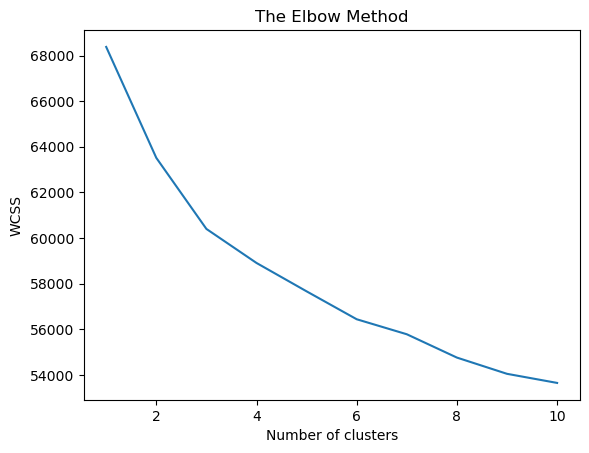

In [8]:
# Plot the elbow  curve
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

In [9]:
# Use 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, n_init=10, random_state=seed)
kmeans.fit(df_km1_mm)

KMeans(max_iter=200, n_clusters=3, n_init=10, random_state=42)

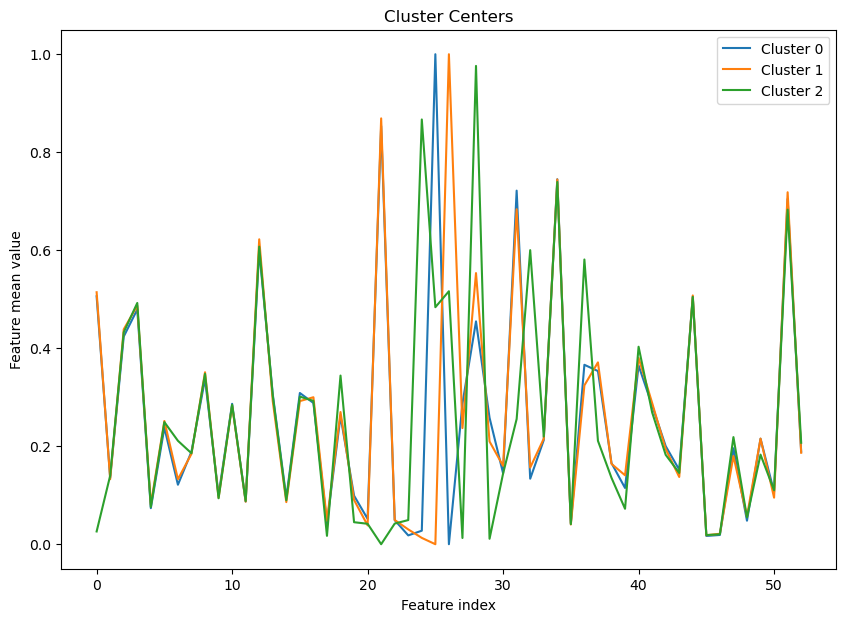

In [10]:
# Examine the clusters
centers = kmeans.cluster_centers_

plt.figure(figsize=(10, 7))
for i, center in enumerate(centers):
    plt.plot(center, label=f'Cluster {i}')
plt.legend()
plt.xlabel('Feature index')
plt.ylabel('Feature mean value')
plt.title('Cluster Centers')
plt.show()

In [11]:
# Examine the clusters in a table format 
centers = kmeans.cluster_centers_


feature_names = df_km1_mm.columns
cluster_centers_df = pd.DataFrame(centers, columns=feature_names)

cluster_centers_df

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_F,Gender_M,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0.505953,0.135954,0.423764,0.479236,0.073583,0.237903,0.121408,0.188899,0.337111,0.100262,0.286545,0.087184,0.599535,0.306016,0.094449,0.308631,0.288288,0.042720,0.261261,0.099099,0.051729,8.535310e-01,0.049114,0.018018,0.027608,1.000000e+00,-2.942091e-15,0.287126,0.454810,0.258065,0.144725,0.721593,0.133682,0.212438,0.744842,0.042720,0.366173,0.353386,0.165650,0.114792,0.364720,0.283057,0.200232,0.151991,0.505086,0.016856,0.018890,0.195873,0.047951,0.215344,0.106655,0.704446,0.188899
1,0.514252,0.132783,0.438572,0.486842,0.081146,0.251574,0.132602,0.184451,0.350960,0.094743,0.282971,0.086874,0.622285,0.291785,0.085930,0.292099,0.299969,0.047844,0.269751,0.090337,0.038401,8.690589e-01,0.049418,0.030217,0.012905,3.663736e-15,1.000000e+00,0.237016,0.553352,0.209632,0.159899,0.683664,0.156437,0.215297,0.744413,0.040290,0.324205,0.371105,0.163991,0.140699,0.380233,0.288322,0.194208,0.137236,0.507712,0.018256,0.021404,0.180044,0.056972,0.215612,0.095058,0.718288,0.186654
2,0.026039,0.139930,0.432580,0.492376,0.075994,0.249205,0.211097,0.185612,0.347774,0.093800,0.284579,0.088235,0.607313,0.302862,0.089825,0.301272,0.292528,0.017091,0.344197,0.044913,0.041733,5.995204e-15,0.042130,0.049285,0.866852,4.837043e-01,5.162957e-01,0.012719,0.976153,0.011129,0.144277,0.255564,0.600159,0.219793,0.739269,0.040938,0.581081,0.211049,0.135533,0.072337,0.403021,0.269078,0.182432,0.145469,0.504769,0.018680,0.020270,0.218601,0.054849,0.182830,0.110095,0.682830,0.207075


In [12]:
cluster_1 = pd.DataFrame(cluster_centers_df.iloc[0])
cluster_2 = pd.DataFrame(cluster_centers_df.iloc[1])
cluster_3 = pd.DataFrame(cluster_centers_df.iloc[2])

In [13]:
cluster_1.sort_values(by=0, ascending=False).head(10)

,0
Gender_F,1.000000
EmploymentStatus_Employed,0.853531
Policy Type_Personal Auto,0.744842
Marital Status_Married,0.721593
Vehicle Size_Medsize,0.704446
Coverage_Basic,0.599535
Income,0.505953
Vehicle Class_Four-Door Car,0.505086
Months Since Policy Inception,0.479236
Location Code_Suburban,0.454810


Cluster 1 = Female, Employed, Married, Medsize vehicle 

In [14]:
cluster_2.sort_values(by=1, ascending=False).head(10)

,1
Gender_M,1.000000
EmploymentStatus_Employed,0.869059
Policy Type_Personal Auto,0.744413
Vehicle Size_Medsize,0.718288
Marital Status_Married,0.683664
Coverage_Basic,0.622285
Location Code_Suburban,0.553352
Income,0.514252
Vehicle Class_Four-Door Car,0.507712
Months Since Policy Inception,0.486842


Cluster 2 = Male, Employed, Medsize vehicle, Married 

In [15]:
cluster_3.sort_values(by=2, ascending=False).head(10)

,2
Location Code_Suburban,0.976153
EmploymentStatus_Unemployed,0.866852
Policy Type_Personal Auto,0.739269
Vehicle Size_Medsize,0.682830
Coverage_Basic,0.607313
Marital Status_Single,0.600159
Renew Offer Type_Offer1,0.581081
Gender_M,0.516296
Vehicle Class_Four-Door Car,0.504769
Months Since Policy Inception,0.492376


Cluster 3 = Suburban, Unemployed, Single, Male 

In [16]:
# We label each observation with the cluster they were assigned to
df['Cluster'] = kmeans.labels_

In [17]:
# Split the dataset into their respective clusters 
df_cluster_1 = df[df['Cluster'] == 0]
df_cluster_2 = df[df['Cluster'] == 1]
df_cluster_3 = df[df['Cluster'] == 2]

In [18]:
df_cluster_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,3441.0,8310.706386,7199.751452,2272.335352,4077.501164,5768.091295,9217.978125,73225.956520
Income,3441.0,50585.705318,25040.990294,0.000000,29160.000000,48943.000000,70521.000000,99961.000000
Monthly Premium Auto,3441.0,93.221157,34.655550,61.000000,69.000000,83.000000,109.000000,297.000000
Months Since Last Claim,3441.0,14.831735,10.022469,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,3441.0,47.444348,28.048181,0.000000,23.000000,47.000000,70.000000,99.000000
Number of Open Complaints,3441.0,0.367916,0.886956,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,3441.0,2.903226,2.361191,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,3441.0,351.348516,242.187063,0.423310,172.226165,326.400000,476.707749,2452.894264
Cluster,3441.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
df_cluster_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,3177.0,7916.134619,6666.457422,2119.894333,4049.807215,5866.068903,8838.085637,83325.381190
Income,3177.0,51415.453887,24345.884499,0.000000,29938.000000,49821.000000,71255.000000,99981.000000
Monthly Premium Auto,3177.0,92.469625,34.320378,61.000000,68.000000,82.000000,108.000000,297.000000
Months Since Last Claim,3177.0,15.350016,10.094278,0.000000,6.000000,14.000000,24.000000,35.000000
Months Since Policy Inception,3177.0,48.197356,27.622621,0.000000,25.000000,48.000000,72.000000,99.000000
Number of Open Complaints,3177.0,0.405729,0.944628,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,3177.0,3.012590,2.449072,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,3177.0,383.734652,259.449316,0.099007,218.395525,344.118069,498.335261,2893.239678
Cluster,3177.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df_cluster_3.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,2516.0,7698.897432,6647.151213,1898.007675,3856.696421,5619.689084,8631.611138,74228.516040
Income,2516.0,2603.418124,6952.104769,0.000000,0.000000,0.000000,0.000000,29981.000000
Monthly Premium Auto,2516.0,94.163355,34.168148,61.000000,69.000000,84.000000,111.000000,298.000000
Months Since Last Claim,2516.0,15.140302,10.111023,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,2516.0,48.745231,28.059577,0.000000,25.000000,49.000000,72.000000,99.000000
Number of Open Complaints,2516.0,0.379968,0.897700,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,2516.0,2.993641,2.353112,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,2516.0,610.831404,312.094694,2.455033,403.200000,525.600000,727.200000,2759.794354
Cluster,2516.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000


# DBSCAN with no feature engineering

In [21]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Cluster
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,1


In [22]:
df_db = df.copy()
df_db.set_index("Customer", inplace=True)
df_db = df_db[["Monthly Premium Auto", "Customer Lifetime Value"]]

In [23]:
# Scale the data
cols = df_db.columns
db_index = df_db.index
scaler = MinMaxScaler()
df_db_mm = pd.DataFrame(scaler.fit_transform(df_db), columns=cols, index=db_index)

In [24]:
df_db_mm.head()

,Monthly Premium Auto,Customer Lifetime Value
Customer,,
BU79786,0.033755,0.010629
QZ44356,0.139241,0.062406
AI49188,0.198312,0.134960
WW63253,0.189873,0.070589
HB64268,0.050633,0.011245


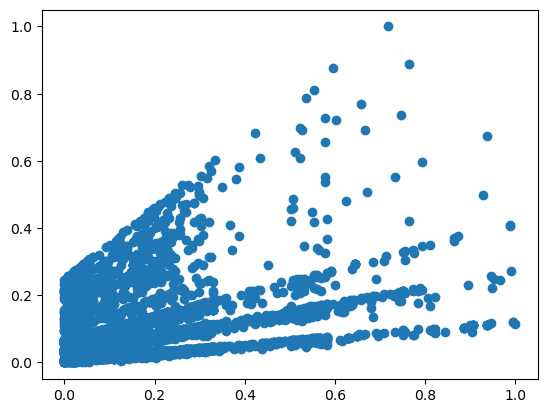

In [25]:
plt.scatter(x=df_db_mm['Monthly Premium Auto'], y=df_db_mm['Customer Lifetime Value'])
plt.show()

In [26]:
df_cut = df_db_mm[(df_db_mm["Customer Lifetime Value"]<0.16) & (df_db_mm["Monthly Premium Auto"]>0.8)]

In [27]:
# We match the segment against the original df
snip = df_cut.index
df.set_index("Customer", inplace=True)
df_snipped = df.loc[snip]

In [28]:
df_snipped_num = df_snipped.select_dtypes(include=["int", "float"])
df_snipped_cat = df_snipped.select_dtypes(include=["object"])

num_var = df_snipped_num.var()
cat_unique = df_snipped_cat.nunique()

In [29]:
df_snipped_num_ = pd.DataFrame({
    'Feature': df_snipped_num.columns,
    'Variance': num_var
})

df_snipped_num_

,Feature,Variance
Customer Lifetime Value,Customer Lifetime Value,4.922933e+05
Income,Income,4.821700e+08
Monthly Premium Auto,Monthly Premium Auto,1.469333e+02
Months Since Last Claim,Months Since Last Claim,8.099570e+01
Months Since Policy Inception,Months Since Policy Inception,6.007183e+02
Number of Open Complaints,Number of Open Complaints,6.236559e-02
Number of Policies,Number of Policies,0.000000e+00
Total Claim Amount,Total Claim Amount,1.600539e+05
Cluster,Cluster,5.784946e-01


In [30]:
df_snipped_cat_ = pd.DataFrame({
    'Feature': df_snipped_cat.columns,
    'VUnique': cat_unique
})

df_snipped_cat_

,Feature,VUnique
State,State,5
Response,Response,2
Coverage,Coverage,1
Education,Education,4
Effective To Date,Effective To Date,15
EmploymentStatus,EmploymentStatus,3
Gender,Gender,2
Location Code,Location Code,2
Marital Status,Marital Status,3
Policy Type,Policy Type,3


In [48]:
# Run DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=2)
clusters = dbscan.fit_predict(df_db)

In [49]:
df_db_mm["DBSCAN Labels"] = dbscan.labels_
df_db_mm['DBSCAN Labels'].value_counts()

DBSCAN Labels
-1      6827
 243       8
 175       8
 233       8
 69        8
        ... 
 332       2
 331       2
 328       2
 327       2
 660       2
Name: count, Length: 662, dtype: int64

In [41]:
# Plot the clusters
plt.figure(figsize=(15, 8))
unique_labels = np.unique(clusters)
for label in unique_labels:
    if label == -1:
        # Plot noise in black
        color = 'k'
    else:
        color = plt.cm.rainbow(float(label) / max(unique_labels))
    plt.scatter(df_db_mm[clusters == label, 0], df_db_mm[clusters == label, 1], c=[color], label=f'Cluster {label}' if label != -1 else 'Noise')

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

InvalidIndexError: (array([ True,  True,  True, ...,  True,  True,  True]), 0)

<Figure size 1500x800 with 0 Axes>